<a href="https://colab.research.google.com/github/MathieuFan22/Mirada-Examen-ML-M2-ISPM/blob/Tsiky/PoketraFinday-Mirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://github.com/MathieuFan22/Mirada-Examen-ML-M2-ISPM.git

fatal: destination path 'Mirada-Examen-ML-M2-ISPM' already exists and is not an empty directory.


In [14]:
!ls

Mirada-Examen-ML-M2-ISPM  sample_data


In [16]:
import pandas as pd

df = pd.read_csv('Mirada-Examen-ML-M2-ISPM/ressources/train.csv')
df.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0


In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Configuration pour de belles visualisations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# 1. VUE D'ENSEMBLE DES DONNÉES
# ============================================
print("=" * 50)
print("INFORMATIONS GÉNÉRALES")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)
print("VALEURS MANQUANTES")
print("=" * 50)
print(df.isnull().sum())

INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   transaction_id  30000 non-null  object  
 1   step            30000 non-null  int64   
 2   type            30000 non-null  object  
 3   amount          30000 non-null  int64   
 4   customer_id     30000 non-null  object  
 5   age             30000 non-null  int64   
 6   is_fraud        30000 non-null  int64   
 7   age_group       30000 non-null  category
dtypes: category(1), int64(4), object(3)
memory usage: 1.6+ MB
None

STATISTIQUES DESCRIPTIVES
               step        amount           age      is_fraud
count  30000.000000  3.000000e+04  30000.000000  30000.000000
mean     361.139733  1.474855e+05     34.516800      0.019833
std      207.894173  4.114664e+05     16.067294      0.139430
min        0.000000  1.000000e+02     18.000000      0.000000
25% 

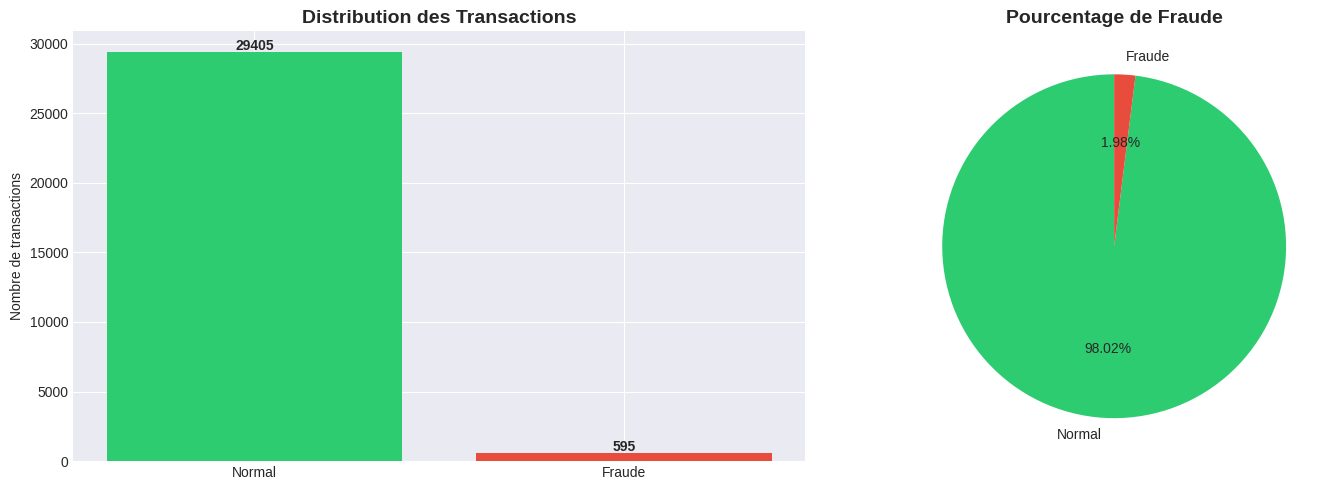


📊 Taux de fraude global : 1.98%


In [26]:
# ============================================
# 2. DISTRIBUTION DE LA FRAUDE
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique en barres
fraud_counts = df['is_fraud'].value_counts()
axes[0].bar(['Normal', 'Fraude'], fraud_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution des Transactions', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre de transactions')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# Graphique circulaire
fraud_pct = df['is_fraud'].value_counts(normalize=True) * 100
axes[1].pie(fraud_pct.values, labels=['Normal', 'Fraude'], autopct='%1.2f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Pourcentage de Fraude', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Taux de fraude global : {fraud_pct[1]:.2f}%")

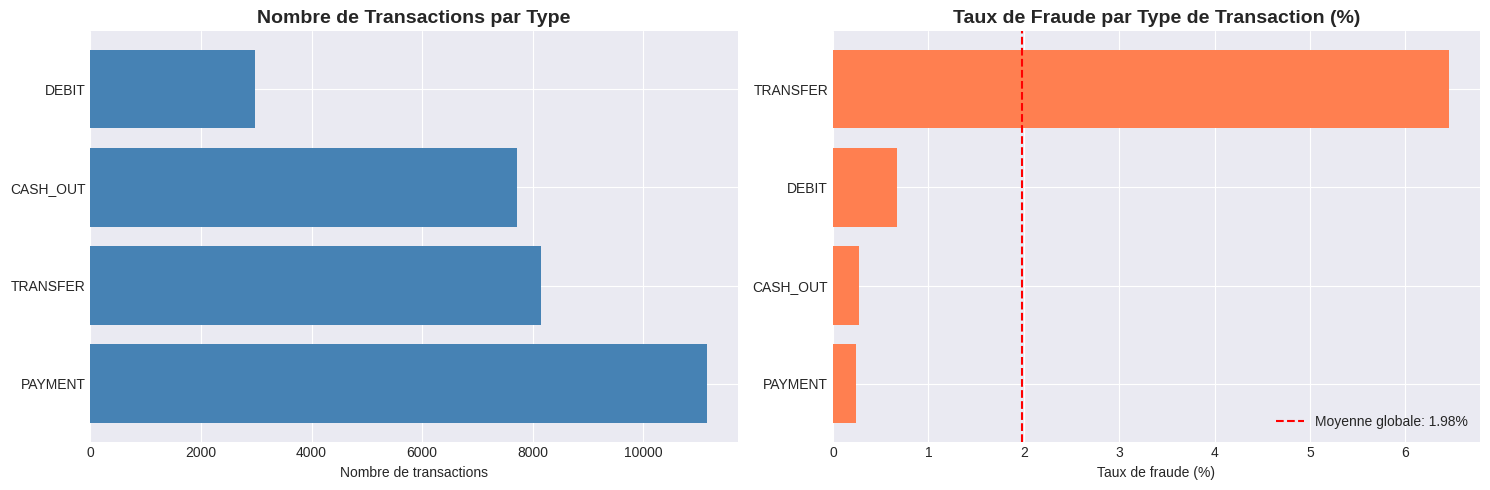


📈 Taux de fraude par type de transaction :
          sum  count  fraud_rate
type                            
PAYMENT    27  11150    0.242152
CASH_OUT   21   7716    0.272162
DEBIT      20   2974    0.672495
TRANSFER  527   8160    6.458333


In [27]:
# ============================================
# 3. ANALYSE PAR TYPE DE TRANSACTION
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Nombre de transactions par type
type_counts = df['type'].value_counts()
axes[0].barh(type_counts.index, type_counts.values, color='steelblue')
axes[0].set_title('Nombre de Transactions par Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de transactions')

# Taux de fraude par type
fraud_by_type = df.groupby('type')['is_fraud'].agg(['sum', 'count', 'mean'])
fraud_by_type['fraud_rate'] = fraud_by_type['mean'] * 100
fraud_by_type = fraud_by_type.sort_values('fraud_rate', ascending=True)

axes[1].barh(fraud_by_type.index, fraud_by_type['fraud_rate'], color='coral')
axes[1].set_title('Taux de Fraude par Type de Transaction (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Taux de fraude (%)')
axes[1].axvline(fraud_pct[1], color='red', linestyle='--', label=f'Moyenne globale: {fraud_pct[1]:.2f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📈 Taux de fraude par type de transaction :")
print(fraud_by_type[['sum', 'count', 'fraud_rate']])

/tmp/ipython-input-1250133420.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_fraud', y='amount', ax=axes[1, 1], palette=['#2ecc71', '#e74c3c'])
/tmp/ipython-input-1250133420.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Normal', 'Fraude'])


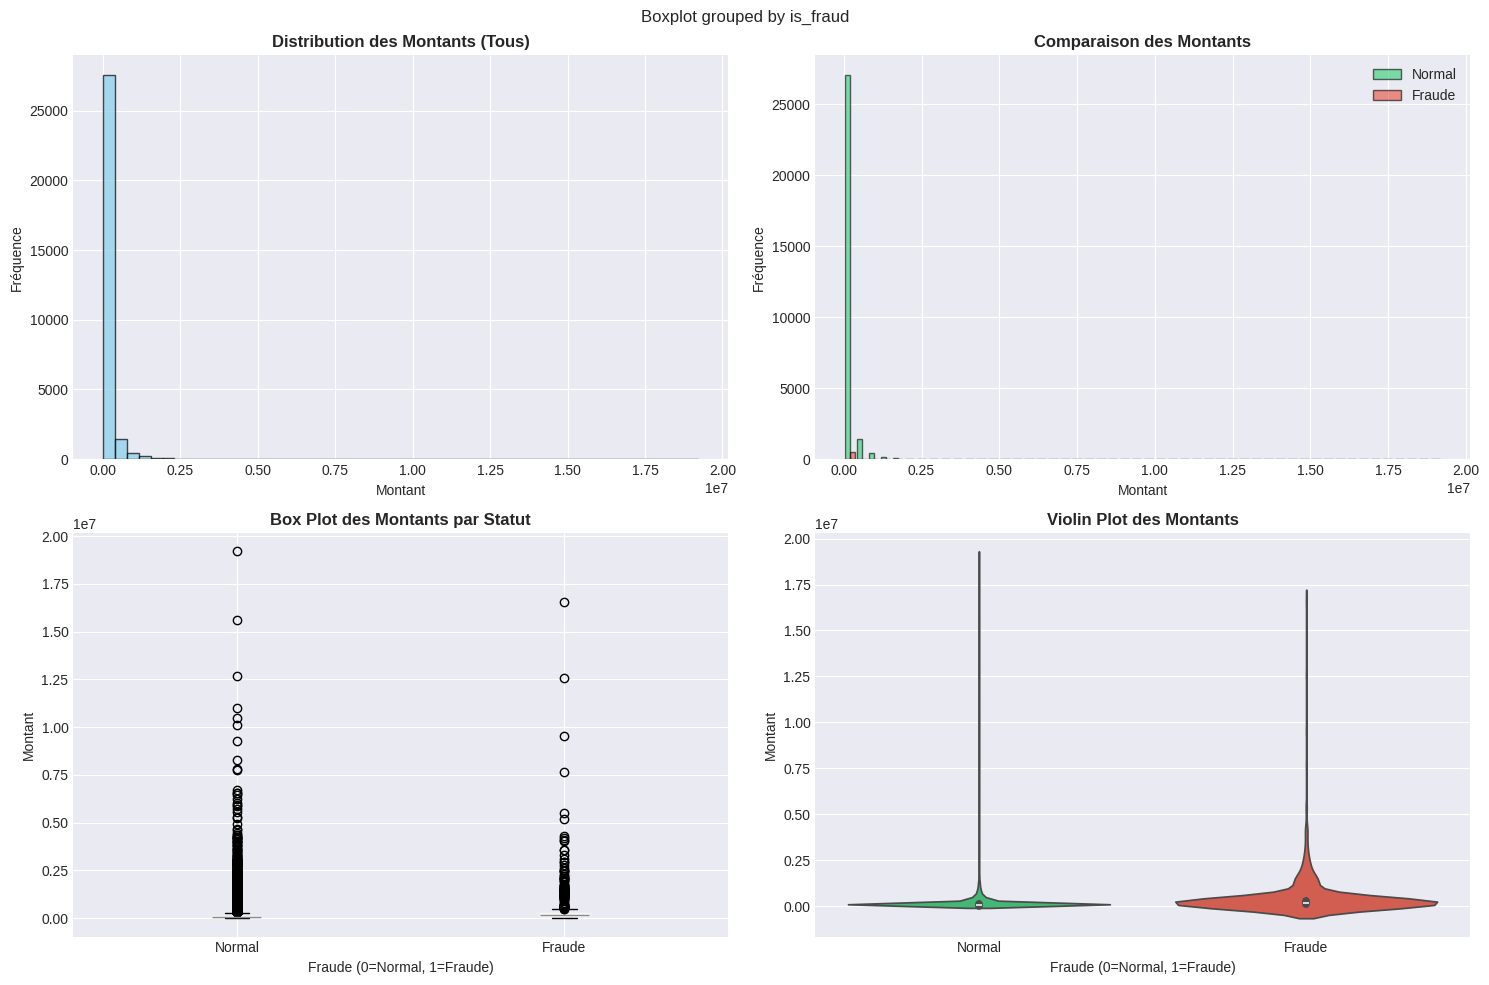


💰 Statistiques des montants :
            count           mean           std     min       25%       50%  \
is_fraud                                                                     
0         29405.0  140615.514368  3.767579e+05   100.0   17400.0   47500.0   
1           595.0  486999.831933  1.185774e+06  1100.0  110000.0  155000.0   

               75%         max  
is_fraud                        
0         130500.0  19214000.0  
1         255000.0  16558000.0  


In [28]:
# ============================================
# 4. DISTRIBUTION DES MONTANTS
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution globale des montants
axes[0, 0].hist(df['amount'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution des Montants (Tous)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Montant')
axes[0, 0].set_ylabel('Fréquence')

# Comparaison Normal vs Fraude
normal_amounts = df[df['is_fraud'] == 0]['amount']
fraud_amounts = df[df['is_fraud'] == 1]['amount']

axes[0, 1].hist([normal_amounts, fraud_amounts], bins=50, label=['Normal', 'Fraude'],
                color=['#2ecc71', '#e74c3c'], alpha=0.6, edgecolor='black')
axes[0, 1].set_title('Comparaison des Montants', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Montant')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].legend()

# Box plot
df.boxplot(column='amount', by='is_fraud', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Box Plot des Montants par Statut', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Fraude (0=Normal, 1=Fraude)')
axes[1, 0].set_ylabel('Montant')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Normal', 'Fraude'])

# Violin plot
sns.violinplot(data=df, x='is_fraud', y='amount', ax=axes[1, 1], palette=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Violin Plot des Montants', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Fraude (0=Normal, 1=Fraude)')
axes[1, 1].set_ylabel('Montant')
axes[1, 1].set_xticklabels(['Normal', 'Fraude'])

plt.tight_layout()
plt.show()

print("\n💰 Statistiques des montants :")
print(df.groupby('is_fraud')['amount'].describe())

/tmp/ipython-input-442980973.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age = df.groupby('age_group')['is_fraud'].mean() * 100


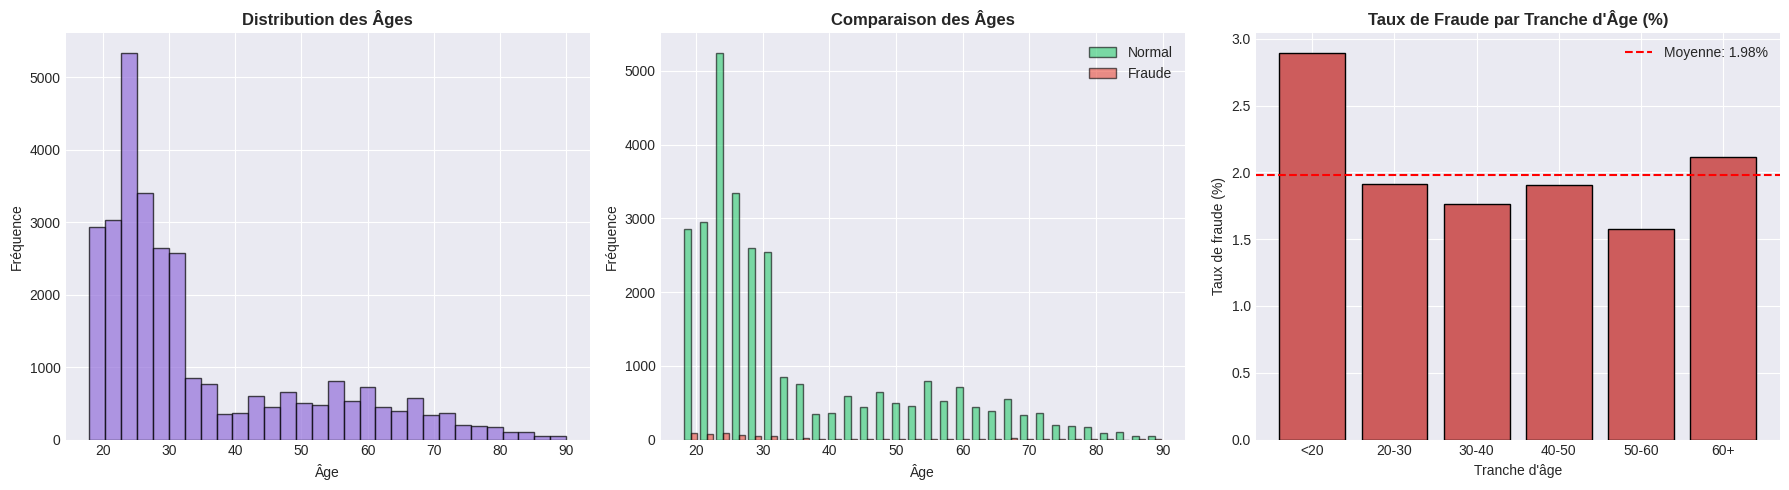


👥 Statistiques des âges :
            count       mean        std   min   25%   50%   75%   max
is_fraud                                                             
0         29405.0  34.532903  16.057592  18.0  23.0  28.0  43.0  90.0
1           595.0  33.721008  16.534002  18.0  22.0  27.0  40.0  88.0


In [29]:
# ============================================
# 5. ANALYSE PAR ÂGE
# ============================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution de l'âge
axes[0].hist(df['age'], bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution des Âges', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Fréquence')

# Comparaison Normal vs Fraude
axes[1].hist([df[df['is_fraud'] == 0]['age'], df[df['is_fraud'] == 1]['age']],
             bins=30, label=['Normal', 'Fraude'], color=['#2ecc71', '#e74c3c'],
             alpha=0.6, edgecolor='black')
axes[1].set_title('Comparaison des Âges', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Âge')
axes[1].set_ylabel('Fréquence')
axes[1].legend()

# Taux de fraude par tranche d'âge
age_bins = [0, 20, 30, 40, 50, 60, 100]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
fraud_by_age = df.groupby('age_group')['is_fraud'].mean() * 100
axes[2].bar(range(len(fraud_by_age)), fraud_by_age.values, color='indianred', edgecolor='black')
axes[2].set_title('Taux de Fraude par Tranche d\'Âge (%)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Tranche d\'âge')
axes[2].set_ylabel('Taux de fraude (%)')
axes[2].set_xticks(range(len(fraud_by_age)))
axes[2].set_xticklabels(fraud_by_age.index)
axes[2].axhline(fraud_pct[1], color='red', linestyle='--', label=f'Moyenne: {fraud_pct[1]:.2f}%')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n👥 Statistiques des âges :")
print(df.groupby('is_fraud')['age'].describe())


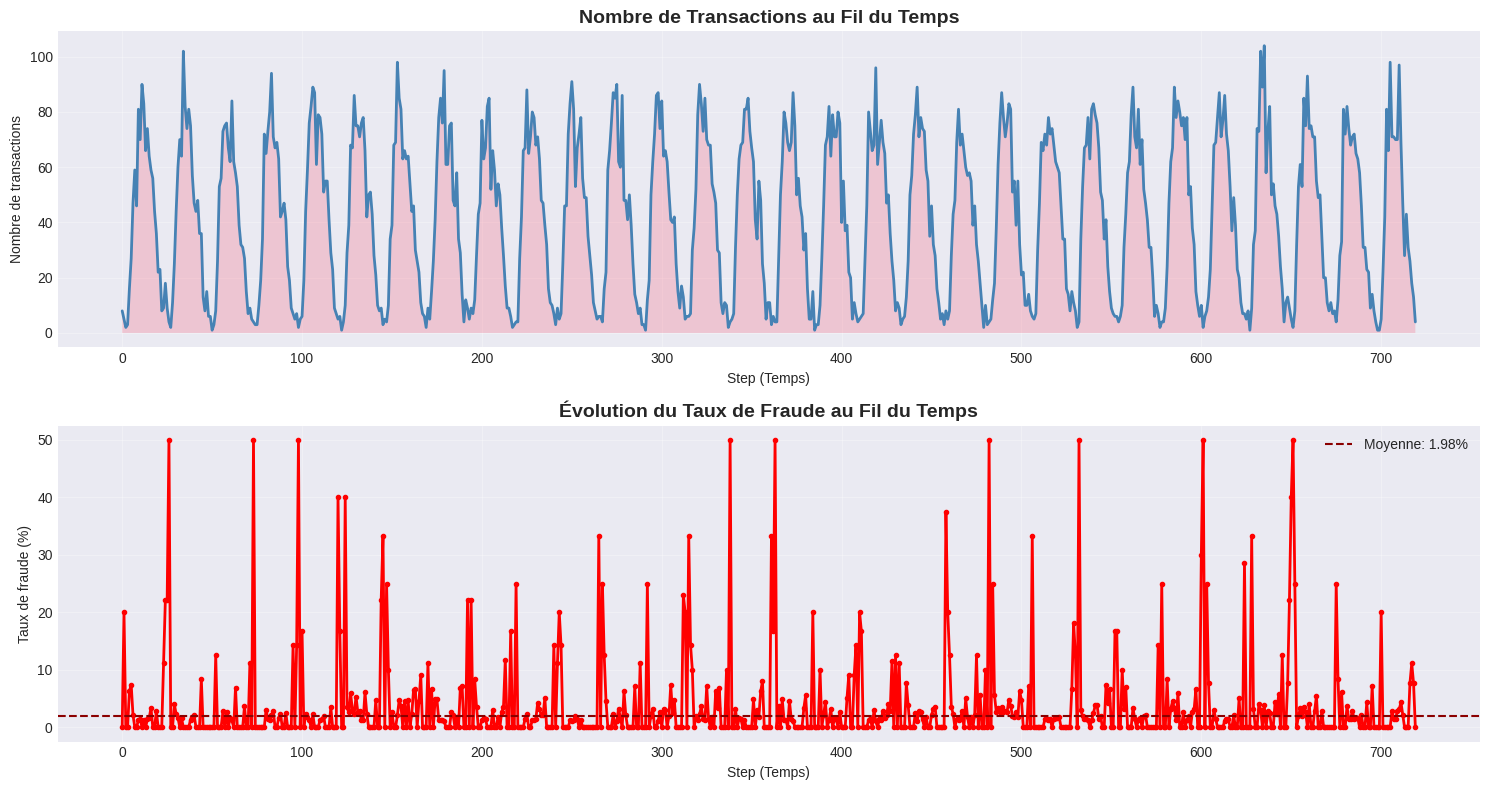

In [30]:
# ============================================
# 6. ÉVOLUTION TEMPORELLE (STEP)
# ============================================
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Nombre de transactions par step
step_counts = df.groupby('step').size()
axes[0].plot(step_counts.index, step_counts.values, color='steelblue', linewidth=2)
axes[0].fill_between(step_counts.index, step_counts.values, alpha=0.3)
axes[0].set_title('Nombre de Transactions au Fil du Temps', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Step (Temps)')
axes[0].set_ylabel('Nombre de transactions')
axes[0].grid(True, alpha=0.3)

# Taux de fraude par step
fraud_by_step = df.groupby('step')['is_fraud'].mean() * 100
axes[1].plot(fraud_by_step.index, fraud_by_step.values, color='red', linewidth=2, marker='o', markersize=3)
axes[1].axhline(fraud_pct[1], color='darkred', linestyle='--', label=f'Moyenne: {fraud_pct[1]:.2f}%')
axes[1].set_title('Évolution du Taux de Fraude au Fil du Temps', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Step (Temps)')
axes[1].set_ylabel('Taux de fraude (%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

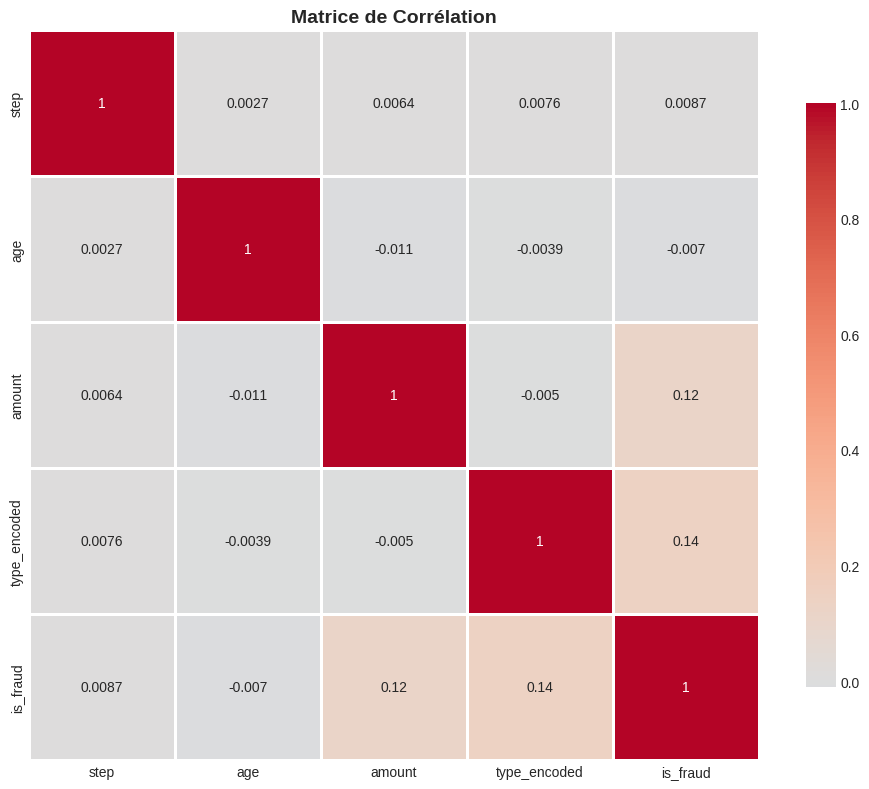

In [31]:
# ============================================
# 7. MATRICE DE CORRÉLATION
# ============================================
# Créer des variables numériques pour la corrélation
df_corr = df.copy()
df_corr['type_encoded'] = df_corr['type'].astype('category').cat.codes

# Calculer la corrélation
corr_matrix = df_corr[['step', 'age', 'amount', 'type_encoded', 'is_fraud']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

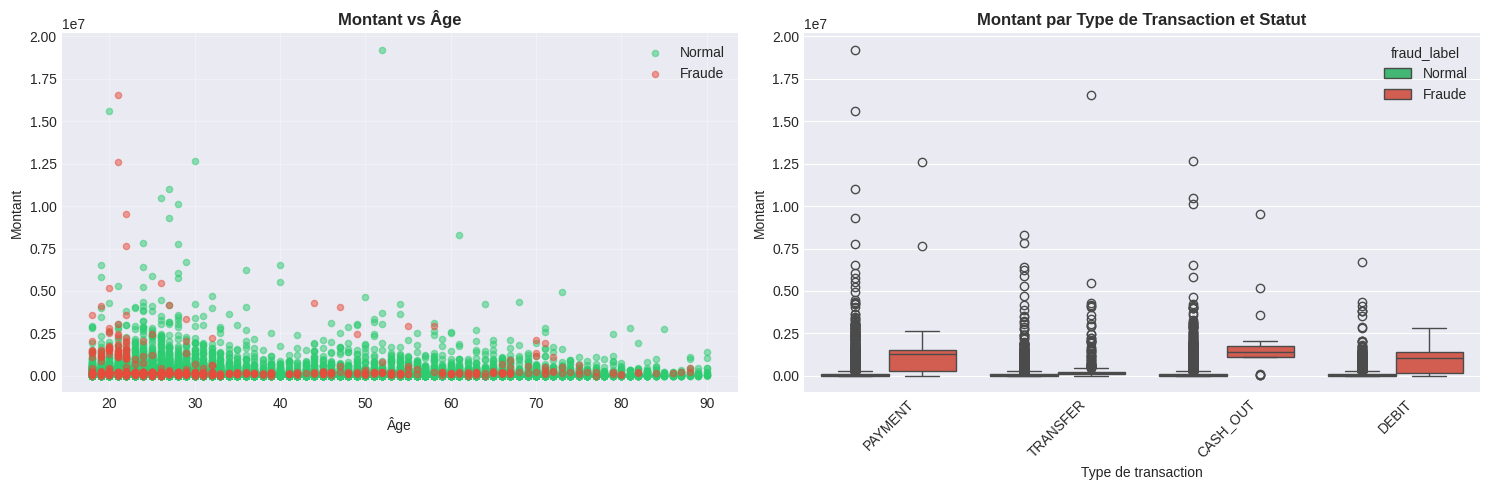


✅ ANALYSE EXPLORATOIRE TERMINÉE


In [32]:
# ============================================
# 8. ANALYSE MULTIVARIÉE
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Montant vs Âge
for fraud_status in [0, 1]:
    subset = df[df['is_fraud'] == fraud_status]
    label = 'Fraude' if fraud_status == 1 else 'Normal'
    color = '#e74c3c' if fraud_status == 1 else '#2ecc71'
    axes[0].scatter(subset['age'], subset['amount'], alpha=0.5, label=label,
                   color=color, s=20)

axes[0].set_title('Montant vs Âge', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Montant')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot: Montant par Type et Fraude
df_viz = df.copy()
df_viz['fraud_label'] = df_viz['is_fraud'].map({0: 'Normal', 1: 'Fraude'})
sns.boxplot(data=df_viz, x='type', y='amount', hue='fraud_label', ax=axes[1],
            palette={'Normal': '#2ecc71', 'Fraude': '#e74c3c'})
axes[1].set_title('Montant par Type de Transaction et Statut', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Type de transaction')
axes[1].set_ylabel('Montant')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("✅ ANALYSE EXPLORATOIRE TERMINÉE")
print("=" * 50)

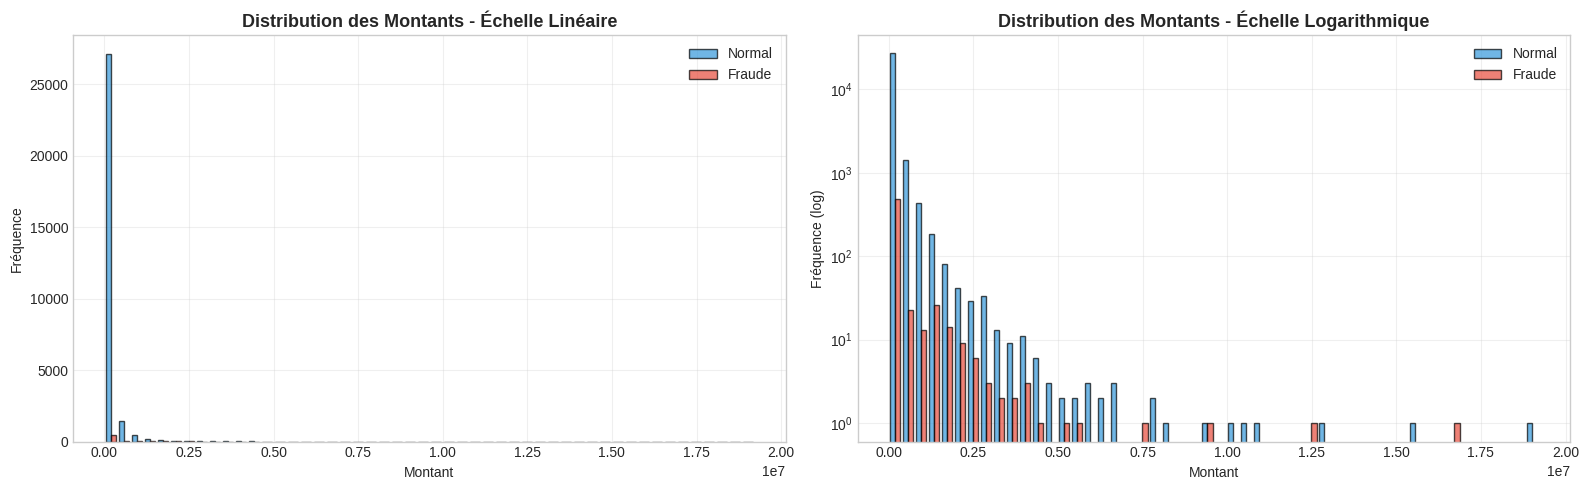

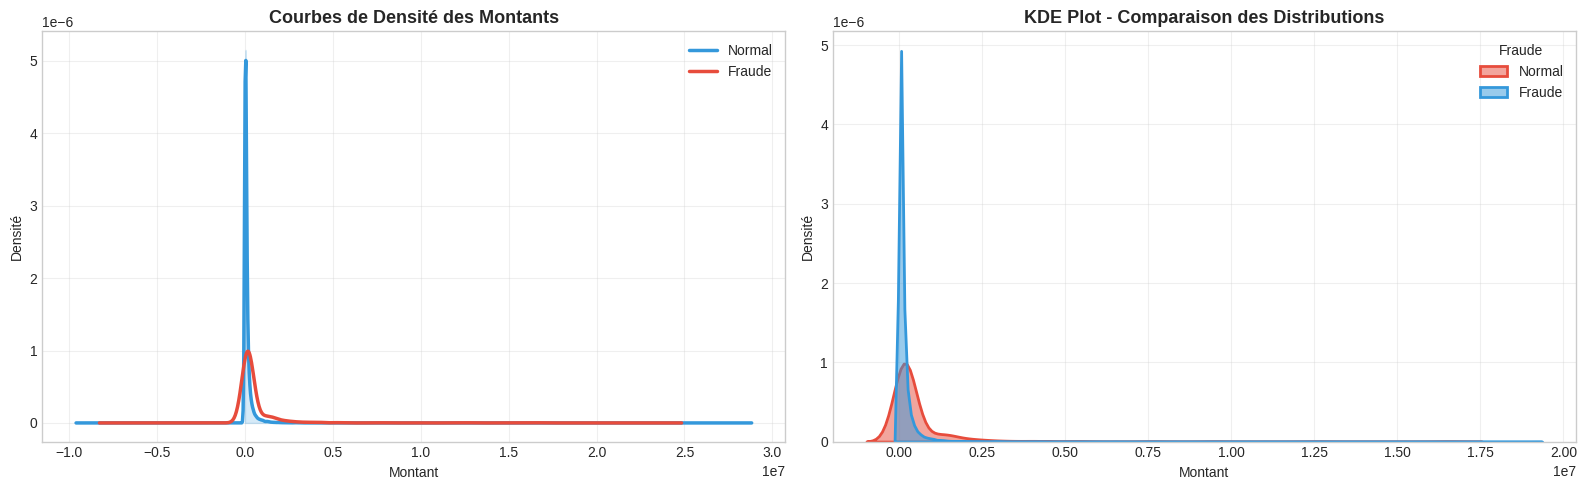

/tmp/ipython-input-2016761380.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_bracket = df.groupby('amount_bracket')['is_fraud'].agg(['sum', 'count', 'mean'])


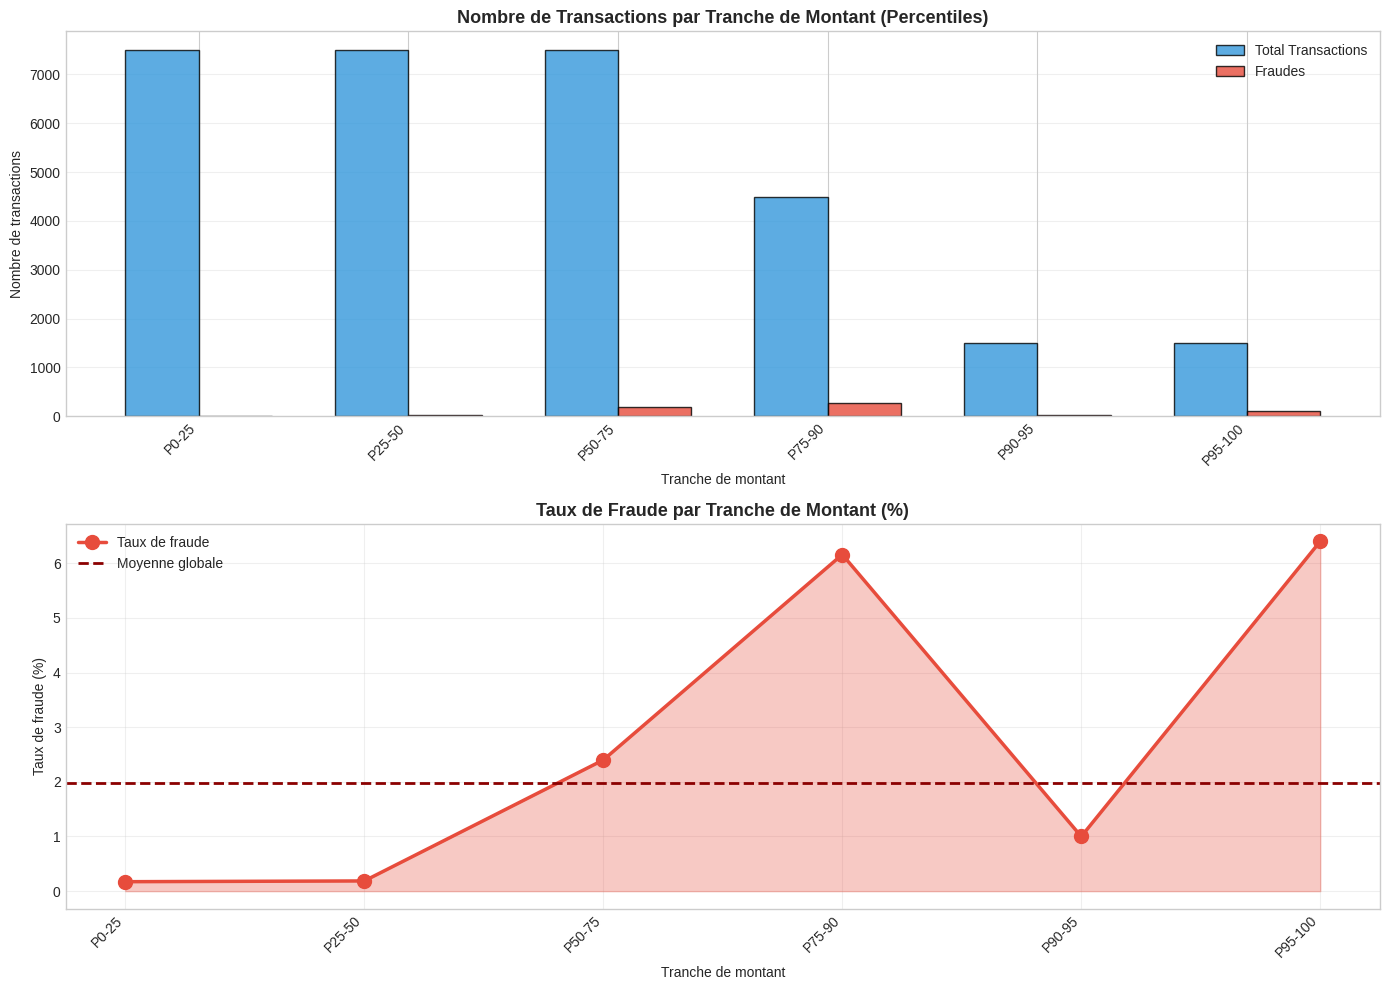


📊 Analyse par tranches de montants (percentiles) :
                sum  count      mean  fraud_rate
amount_bracket                                  
P0-25            13   7508  0.001731    0.173149
P25-50           14   7493  0.001868    0.186841
P50-75          180   7501  0.023997    2.399680
P75-90          277   4498  0.061583    6.158293
P90-95           15   1500  0.010000    1.000000
P95-100          96   1500  0.064000    6.400000


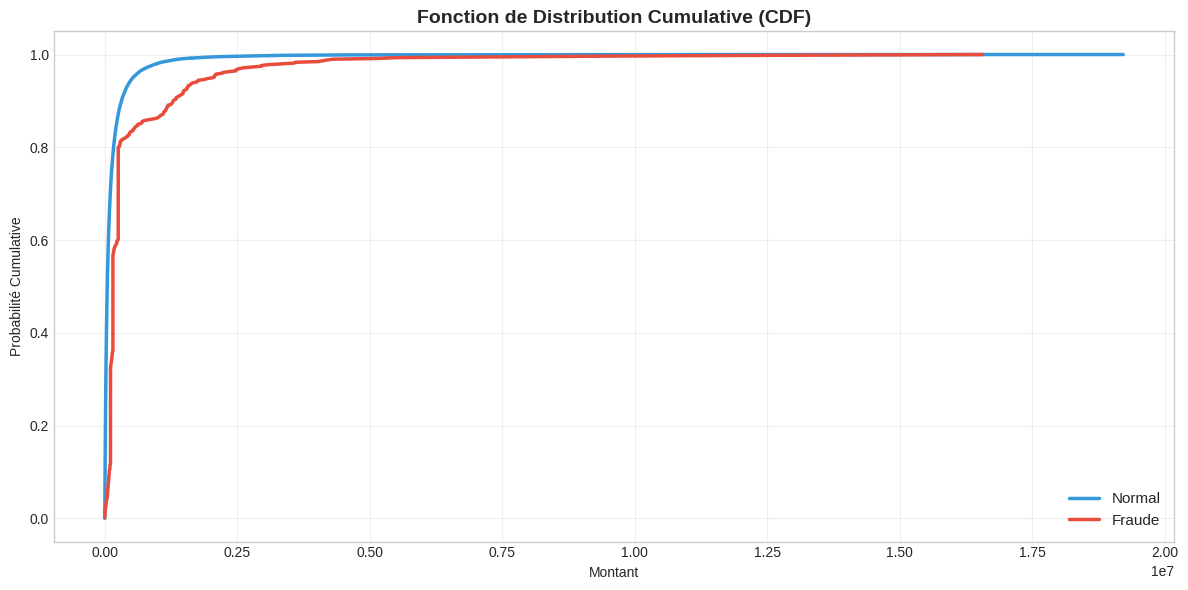

/tmp/ipython-input-2016761380.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['step_bin', 'amount_bin'])['is_fraud'].mean() * 100


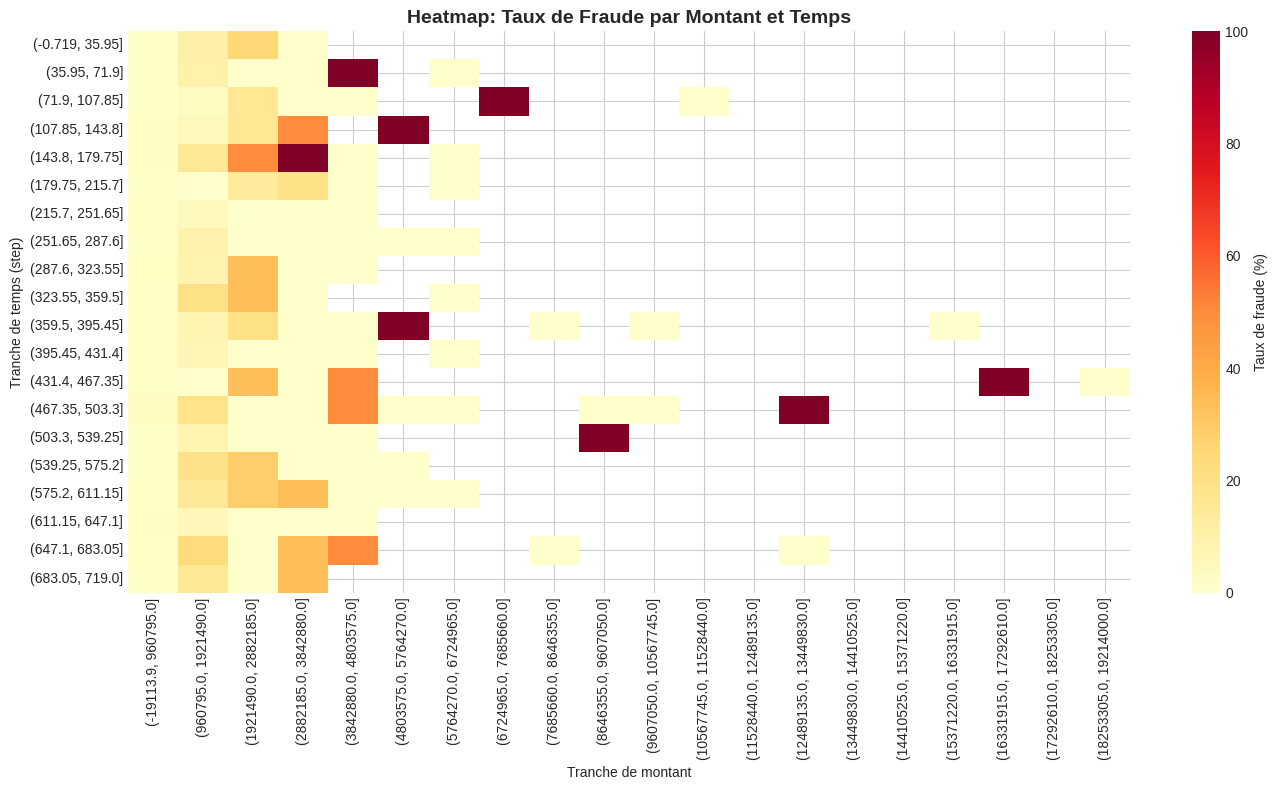

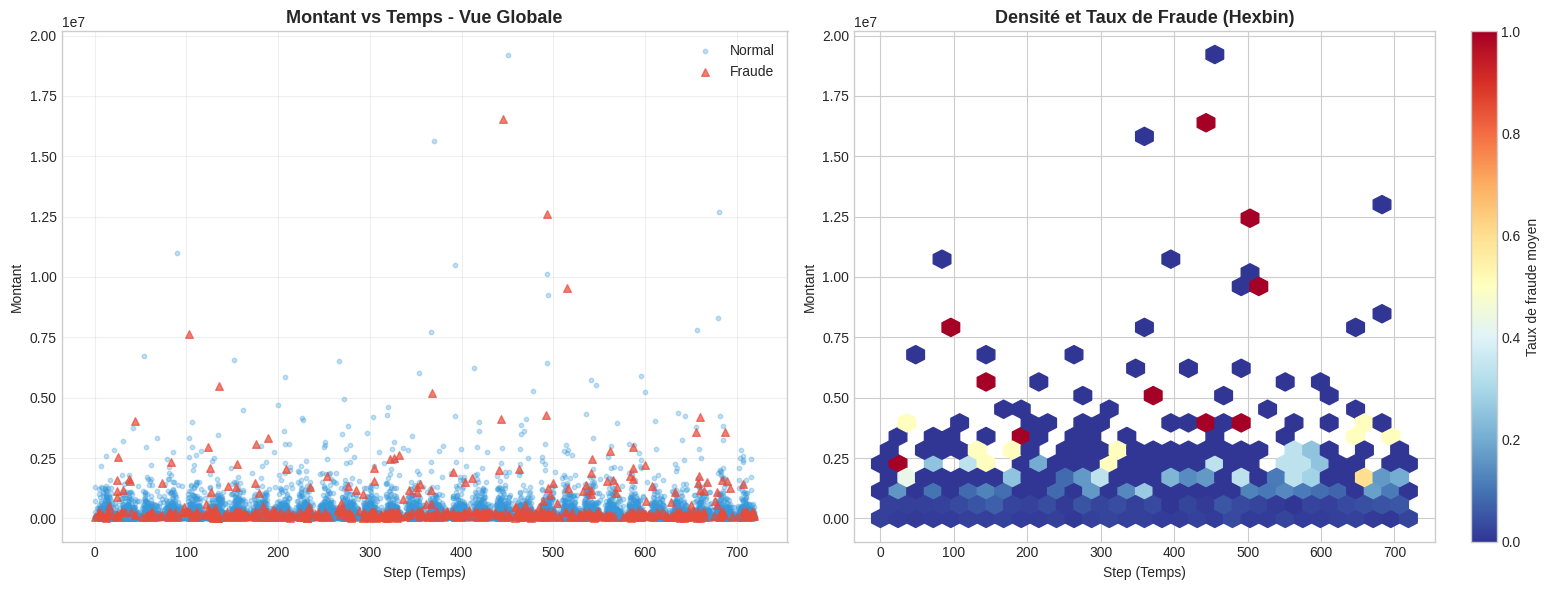

/tmp/ipython-input-2016761380.py:209: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_cat = df.groupby(['amount_category', 'is_fraud']).size().unstack(fill_value=0)
/tmp/ipython-input-2016761380.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_cat = df.groupby('amount_category')['is_fraud'].mean() * 100


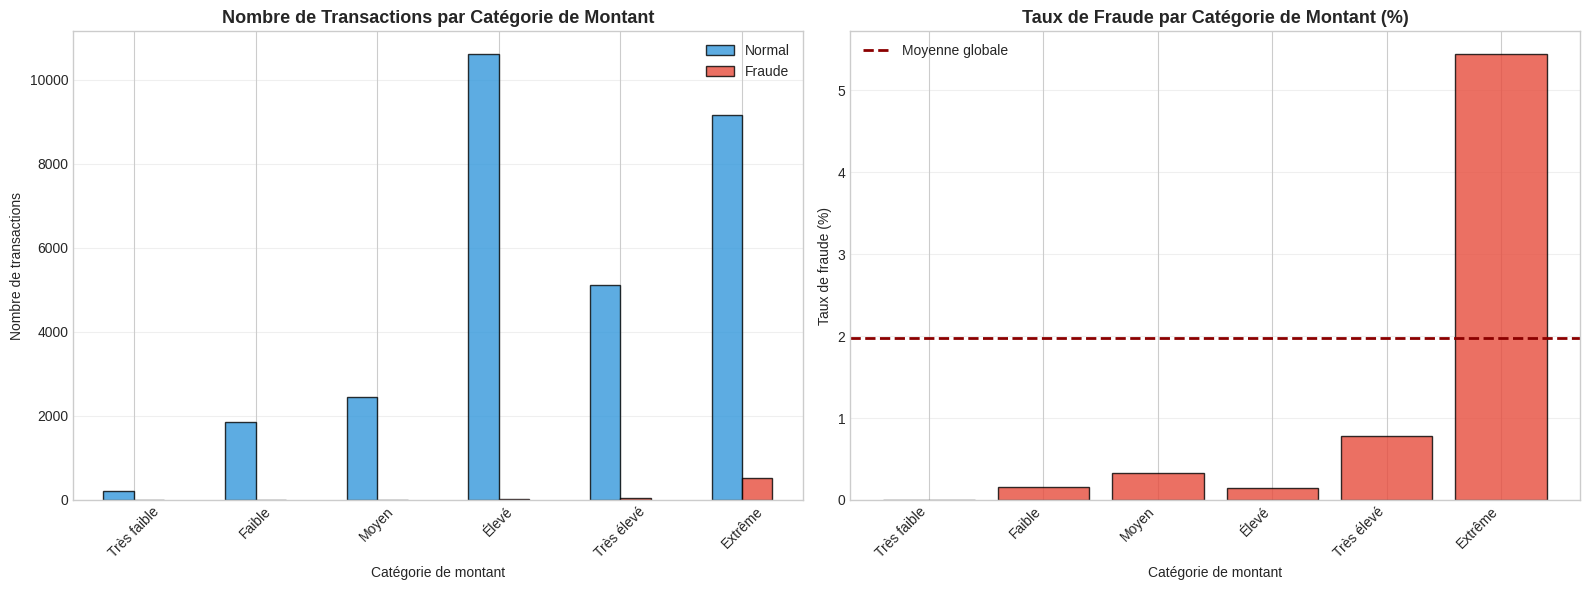


💰 Taux de fraude par catégorie de montant :
amount_category
Très faible    0.000000
Faible         0.161290
Moyen          0.324939
Élevé          0.150489
Très élevé     0.775946
Extrême        5.449479
Name: is_fraud, dtype: float64

STATISTIQUES DÉTAILLÉES DES MONTANTS

📈 Transactions NORMALES :
  - Moyenne: 140615.51
  - Médiane: 47500.00
  - Écart-type: 376757.86
  - Min: 100.00
  - Max: 19214000.00
  - Q1 (25%): 17400.00
  - Q3 (75%): 130500.00

🚨 Transactions FRAUDULEUSES :
  - Moyenne: 486999.83
  - Médiane: 155000.00
  - Écart-type: 1185774.12
  - Min: 1100.00
  - Max: 16558000.00
  - Q1 (25%): 110000.00
  - Q3 (75%): 255000.00

📊 Test de Mann-Whitney U:
  - Statistique: 3717914.00
  - P-value: 0.000000
  ✅ Les distributions sont significativement différentes



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# ============================================
# 1. DISTRIBUTION LOG-SCALE DES MONTANTS
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Échelle normale
normal_amounts = df[df['is_fraud'] == 0]['amount']
fraud_amounts = df[df['is_fraud'] == 1]['amount']

axes[0].hist([normal_amounts, fraud_amounts], bins=50, label=['Normal', 'Fraude'],
             color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution des Montants - Échelle Linéaire', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Montant')
axes[0].set_ylabel('Fréquence')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Échelle logarithmique
axes[1].hist([normal_amounts, fraud_amounts], bins=50, label=['Normal', 'Fraude'],
             color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', log=True)
axes[1].set_title('Distribution des Montants - Échelle Logarithmique', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Montant')
axes[1].set_ylabel('Fréquence (log)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 2. DENSITY PLOT ET KDE
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Density plot
normal_amounts.plot.density(ax=axes[0], color='#3498db', linewidth=2.5, label='Normal')
fraud_amounts.plot.density(ax=axes[0], color='#e74c3c', linewidth=2.5, label='Fraude')
axes[0].set_title('Courbes de Densité des Montants', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Montant')
axes[0].set_ylabel('Densité')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(normal_amounts.sort_values(), 0,
                     stats.gaussian_kde(normal_amounts)(normal_amounts.sort_values()),
                     alpha=0.2, color='#3498db')

# KDE avec seaborn
sns.kdeplot(data=df, x='amount', hue='is_fraud', ax=axes[1],
            fill=True, common_norm=False, palette={0: '#3498db', 1: '#e74c3c'},
            alpha=0.5, linewidth=2)
axes[1].set_title('KDE Plot - Comparaison des Distributions', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Montant')
axes[1].set_ylabel('Densité')
axes[1].legend(title='Fraude', labels=['Normal', 'Fraude'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 3. PERCENTILES ET TRANCHES DE MONTANTS
# ============================================
# Créer des tranches de montants
percentiles = [0, 25, 50, 75, 90, 95, 100]
amount_bins = np.percentile(df['amount'], percentiles)
df['amount_bracket'] = pd.cut(df['amount'], bins=amount_bins,
                               labels=[f'P{percentiles[i]}-{percentiles[i+1]}'
                                      for i in range(len(percentiles)-1)],
                               include_lowest=True)

# Calculer le taux de fraude par tranche
fraud_by_bracket = df.groupby('amount_bracket')['is_fraud'].agg(['sum', 'count', 'mean'])
fraud_by_bracket['fraud_rate'] = fraud_by_bracket['mean'] * 100

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Graphique 1: Nombre de transactions et fraudes par tranche
x_pos = np.arange(len(fraud_by_bracket))
width = 0.35

axes[0].bar(x_pos - width/2, fraud_by_bracket['count'], width,
           label='Total Transactions', color='#3498db', alpha=0.8, edgecolor='black')
axes[0].bar(x_pos + width/2, fraud_by_bracket['sum'], width,
           label='Fraudes', color='#e74c3c', alpha=0.8, edgecolor='black')
axes[0].set_title('Nombre de Transactions par Tranche de Montant (Percentiles)',
                 fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tranche de montant')
axes[0].set_ylabel('Nombre de transactions')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(fraud_by_bracket.index, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Graphique 2: Taux de fraude par tranche
axes[1].plot(x_pos, fraud_by_bracket['fraud_rate'], marker='o', linewidth=2.5,
            markersize=10, color='#e74c3c', label='Taux de fraude')
axes[1].fill_between(x_pos, fraud_by_bracket['fraud_rate'], alpha=0.3, color='#e74c3c')
axes[1].axhline(df['is_fraud'].mean() * 100, color='darkred', linestyle='--',
               linewidth=2, label='Moyenne globale')
axes[1].set_title('Taux de Fraude par Tranche de Montant (%)',
                 fontsize=13, fontweight='bold')
axes[1].set_xlabel('Tranche de montant')
axes[1].set_ylabel('Taux de fraude (%)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(fraud_by_bracket.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Analyse par tranches de montants (percentiles) :")
print(fraud_by_bracket)

# ============================================
# 4. CUMULATIVE DISTRIBUTION FUNCTION (CDF)
# ============================================
fig, ax = plt.subplots(figsize=(12, 6))

# Calculer les CDF
normal_sorted = np.sort(normal_amounts)
fraud_sorted = np.sort(fraud_amounts)

normal_cdf = np.arange(1, len(normal_sorted) + 1) / len(normal_sorted)
fraud_cdf = np.arange(1, len(fraud_sorted) + 1) / len(fraud_sorted)

ax.plot(normal_sorted, normal_cdf, color='#3498db', linewidth=2.5, label='Normal')
ax.plot(fraud_sorted, fraud_cdf, color='#e74c3c', linewidth=2.5, label='Fraude')
ax.set_title('Fonction de Distribution Cumulative (CDF)', fontsize=14, fontweight='bold')
ax.set_xlabel('Montant')
ax.set_ylabel('Probabilité Cumulative')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 5. HEATMAP: MONTANT vs TEMPS (STEP)
# ============================================
# Créer des bins pour step et amount
df['step_bin'] = pd.cut(df['step'], bins=20)
df['amount_bin'] = pd.cut(df['amount'], bins=20)

# Calculer le taux de fraude pour chaque combinaison
heatmap_data = df.groupby(['step_bin', 'amount_bin'])['is_fraud'].mean() * 100
heatmap_pivot = heatmap_data.unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(heatmap_pivot, cmap='YlOrRd', annot=False, fmt='.1f',
           cbar_kws={'label': 'Taux de fraude (%)'}, ax=ax)
ax.set_title('Heatmap: Taux de Fraude par Montant et Temps', fontsize=14, fontweight='bold')
ax.set_xlabel('Tranche de montant')
ax.set_ylabel('Tranche de temps (step)')
plt.tight_layout()
plt.show()

# ============================================
# 6. SCATTER PLOT AVEC TRANSPARENCE
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot simple
axes[0].scatter(df[df['is_fraud'] == 0]['step'],
               df[df['is_fraud'] == 0]['amount'],
               alpha=0.3, s=10, color='#3498db', label='Normal')
axes[0].scatter(df[df['is_fraud'] == 1]['step'],
               df[df['is_fraud'] == 1]['amount'],
               alpha=0.7, s=30, color='#e74c3c', label='Fraude', marker='^')
axes[0].set_title('Montant vs Temps - Vue Globale', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Step (Temps)')
axes[0].set_ylabel('Montant')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Hexbin plot pour densité
hexbin = axes[1].hexbin(df['step'], df['amount'], C=df['is_fraud'],
                       gridsize=30, cmap='RdYlBu_r', reduce_C_function=np.mean)
axes[1].set_title('Densité et Taux de Fraude (Hexbin)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Step (Temps)')
axes[1].set_ylabel('Montant')
cb = plt.colorbar(hexbin, ax=axes[1])
cb.set_label('Taux de fraude moyen')

plt.tight_layout()
plt.show()

# ============================================
# 7. BOX PLOT PAR TRANCHES DE MONTANTS
# ============================================
# Créer des tranches plus simples
df['amount_category'] = pd.cut(df['amount'],
                                bins=[0, 1000, 5000, 10000, 50000, 100000, df['amount'].max()],
                                labels=['Très faible', 'Faible', 'Moyen', 'Élevé', 'Très élevé', 'Extrême'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
fraud_by_cat = df.groupby(['amount_category', 'is_fraud']).size().unstack(fill_value=0)
fraud_by_cat.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'],
                  edgecolor='black', alpha=0.8)
axes[0].set_title('Nombre de Transactions par Catégorie de Montant',
                 fontsize=13, fontweight='bold')
axes[0].set_xlabel('Catégorie de montant')
axes[0].set_ylabel('Nombre de transactions')
axes[0].legend(['Normal', 'Fraude'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Taux de fraude par catégorie
fraud_rate_cat = df.groupby('amount_category')['is_fraud'].mean() * 100
axes[1].bar(range(len(fraud_rate_cat)), fraud_rate_cat.values,
           color='#e74c3c', edgecolor='black', alpha=0.8)
axes[1].axhline(df['is_fraud'].mean() * 100, color='darkred',
               linestyle='--', linewidth=2, label='Moyenne globale')
axes[1].set_title('Taux de Fraude par Catégorie de Montant (%)',
                 fontsize=13, fontweight='bold')
axes[1].set_xlabel('Catégorie de montant')
axes[1].set_ylabel('Taux de fraude (%)')
axes[1].set_xticks(range(len(fraud_rate_cat)))
axes[1].set_xticklabels(fraud_rate_cat.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💰 Taux de fraude par catégorie de montant :")
print(fraud_rate_cat)

# ============================================
# 8. STATISTIQUES COMPARATIVES DÉTAILLÉES
# ============================================
print("\n" + "="*60)
print("STATISTIQUES DÉTAILLÉES DES MONTANTS")
print("="*60)

print("\n📈 Transactions NORMALES :")
print(f"  - Moyenne: {normal_amounts.mean():.2f}")
print(f"  - Médiane: {normal_amounts.median():.2f}")
print(f"  - Écart-type: {normal_amounts.std():.2f}")
print(f"  - Min: {normal_amounts.min():.2f}")
print(f"  - Max: {normal_amounts.max():.2f}")
print(f"  - Q1 (25%): {normal_amounts.quantile(0.25):.2f}")
print(f"  - Q3 (75%): {normal_amounts.quantile(0.75):.2f}")

print("\n🚨 Transactions FRAUDULEUSES :")
print(f"  - Moyenne: {fraud_amounts.mean():.2f}")
print(f"  - Médiane: {fraud_amounts.median():.2f}")
print(f"  - Écart-type: {fraud_amounts.std():.2f}")
print(f"  - Min: {fraud_amounts.min():.2f}")
print(f"  - Max: {fraud_amounts.max():.2f}")
print(f"  - Q1 (25%): {fraud_amounts.quantile(0.25):.2f}")
print(f"  - Q3 (75%): {fraud_amounts.quantile(0.75):.2f}")

# Test statistique
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(normal_amounts, fraud_amounts)
print(f"\n📊 Test de Mann-Whitney U:")
print(f"  - Statistique: {stat:.2f}")
print(f"  - P-value: {p_value:.6f}")
if p_value < 0.05:
    print("  ✅ Les distributions sont significativement différentes")
else:
    print("  ❌ Pas de différence significative détectée")

print("\n" + "="*60)

ANALYSE DE FRAUDE PAR CLIENT (CUSTOMER_ID)

📊 STATISTIQUES GÉNÉRALES
----------------------------------------------------------------------
Nombre total de clients : 29,997
Nombre moyen de transactions par client : 1.00
Médiane de transactions par client : 1
Max de transactions par un seul client : 2

Clients ayant au moins 1 transaction frauduleuse : 595
Clients sans fraude : 29,402
% de clients touchés par la fraude : 1.98%

PROFIL DES CLIENTS
----------------------------------------------------------------------
  customer_id  fraud_count  fraud_rate  transaction_count  total_amount  \
0   C10000349            0         0.0                  1        143800   
1   C10000560            0         0.0                  1         40700   
2   C10001343            0         0.0                  1        327500   
3   C10002575            0         0.0                  1         43000   
4   C10002590            0         0.0                  1         49100   
5   C10015682            0   

/tmp/ipython-input-631067061.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_trans = customer_stats.groupby('client_category')['transaction_count'].mean()


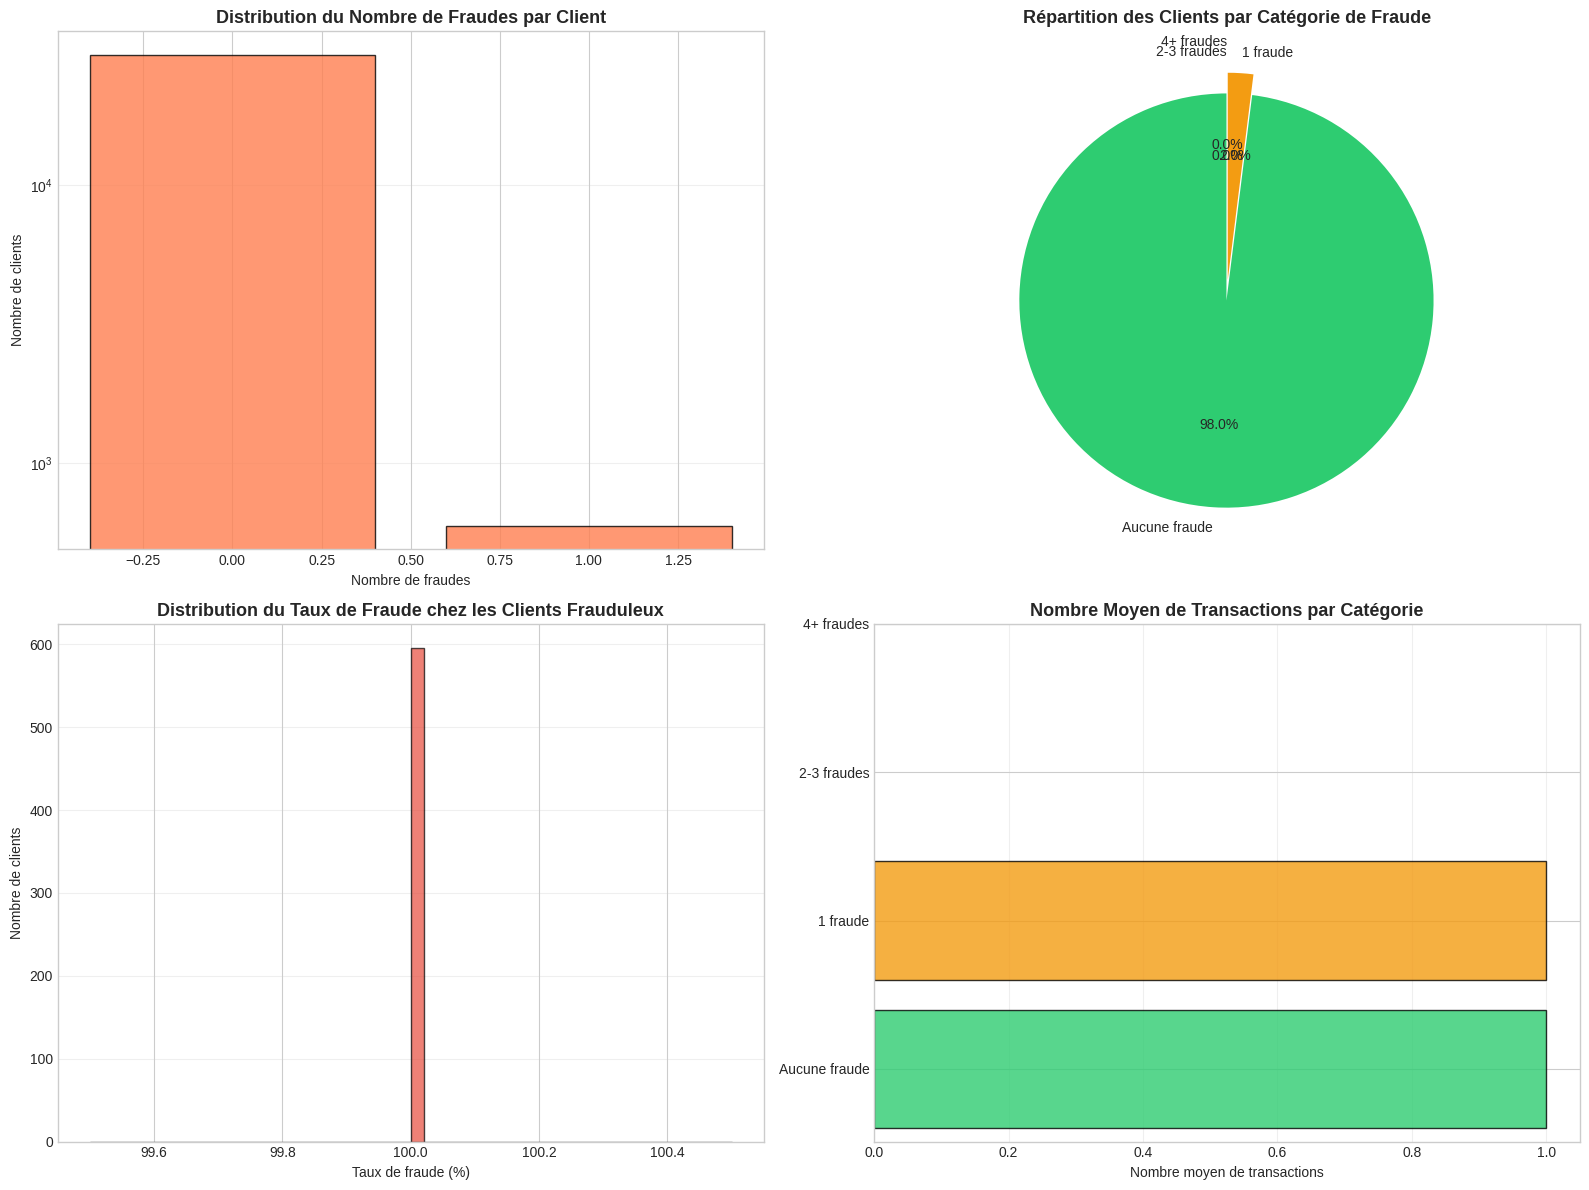

/tmp/ipython-input-631067061.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_amount = customer_stats.groupby('client_category')['total_amount'].mean()
/tmp/ipython-input-631067061.py:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg = customer_stats.groupby('client_category')['avg_amount'].mean()
/tmp/ipython-input-631067061.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_stats, x='client_category', y='avg_amount

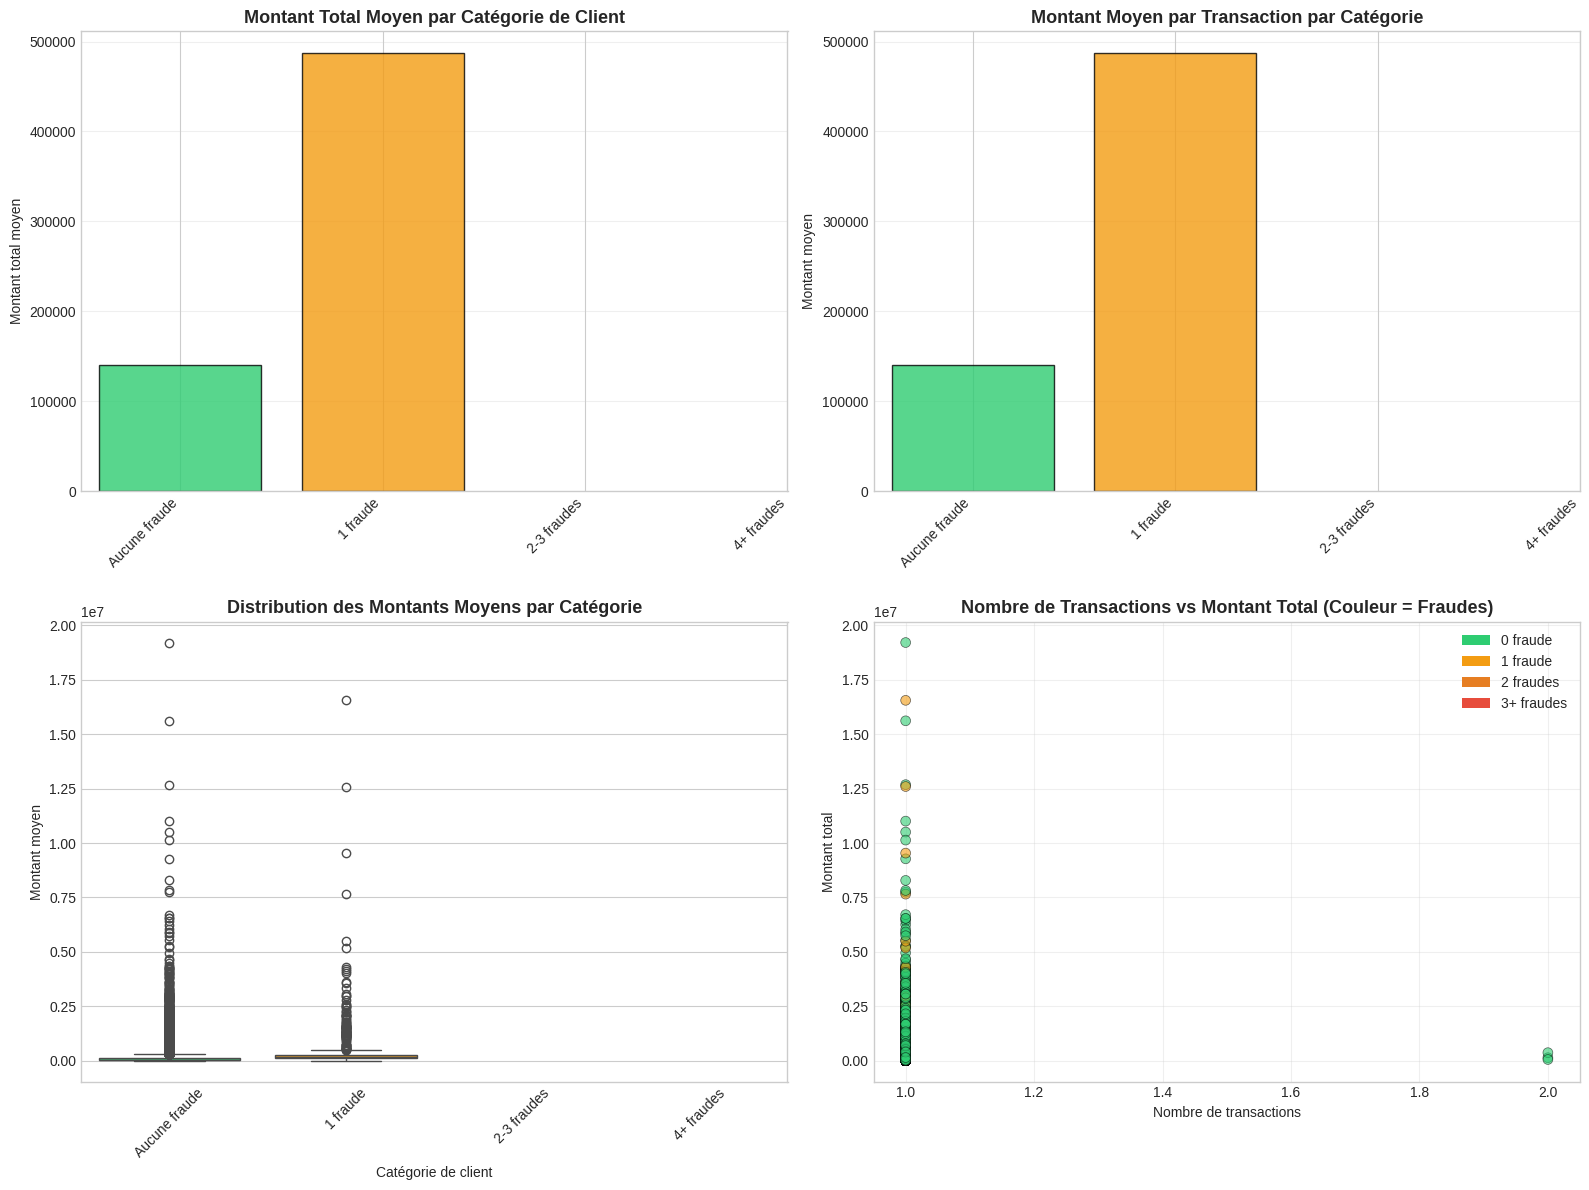


🚨 TOP 20 CLIENTS AVEC LE PLUS DE FRAUDES
----------------------------------------------------------------------
customer_id  fraud_count  transaction_count  fraud_rate  total_amount  avg_amount  age
  C10181023            1                  1         1.0        168000    168000.0   69
  C10251648            1                  1         1.0        102200    102200.0   60
  C10289463            1                  1         1.0        110000    110000.0   61
  C10429048            1                  1         1.0        155000    155000.0   44
  C10496236            1                  1         1.0        255000    255000.0   74
  C10601255            1                  1         1.0       2018000   2018000.0   22
  C10689380            1                  1         1.0        155000    155000.0   27
  C10701462            1                  1         1.0        255000    255000.0   20
  C11263632            1                  1         1.0        255000    255000.0   24
  C11326745      

/tmp/ipython-input-631067061.py:181: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_category = customer_stats.groupby('client_category')['age'].mean()


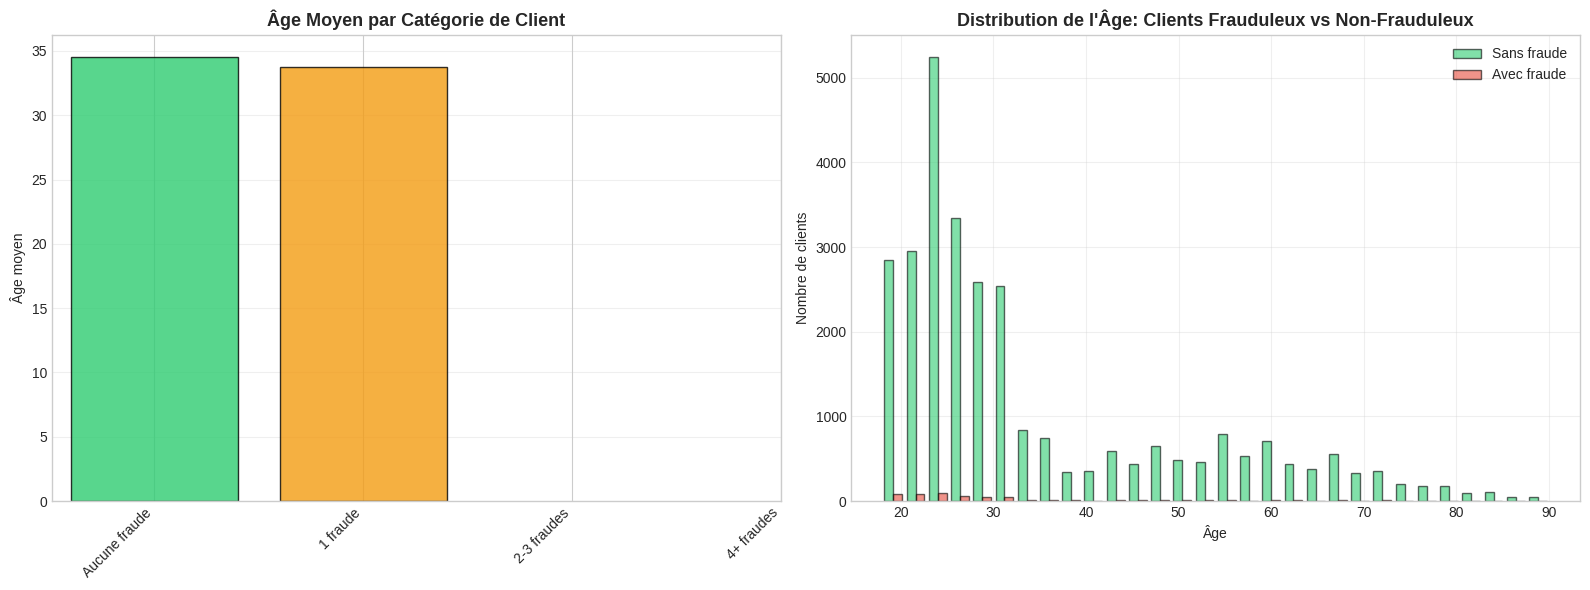


🔄 RÉCIDIVISTES (Clients avec 2+ fraudes): 0
----------------------------------------------------------------------
Nombre total de fraudes commises par les récidivistes: 0
% des fraudes totales: 0.00%
Montant total fraudé par les récidivistes: 0.00


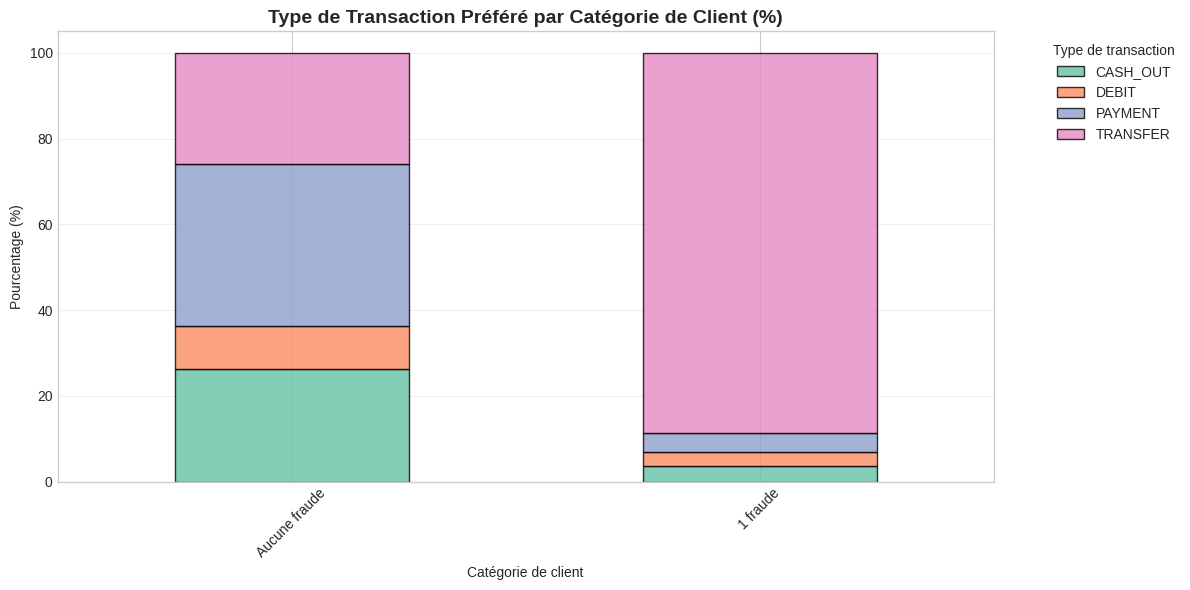


📋 RÉSUMÉ PAR CATÉGORIE DE CLIENT
----------------------------------------------------------------------
                 Nb clients  Total fraudes  Moy trans  Moy montant total  \
client_category                                                            
Aucune fraude         29402              0        1.0          140629.86   
1 fraude                595            595        1.0          486999.83   
2-3 fraudes               0              0        NaN                NaN   
4+ fraudes                0              0        NaN                NaN   

                 Moy montant/trans  Âge moyen  
client_category                                
Aucune fraude            140620.50      34.53  
1 fraude                 486999.83      33.72  
2-3 fraudes                    NaN        NaN  
4+ fraudes                     NaN        NaN  

✅ ANALYSE PAR CLIENT TERMINÉE


/tmp/ipython-input-631067061.py:241: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = customer_stats.groupby('client_category').agg({


In [34]:
# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("=" * 70)
print("ANALYSE DE FRAUDE PAR CLIENT (CUSTOMER_ID)")
print("=" * 70)

# ============================================
# 1. STATISTIQUES GÉNÉRALES PAR CLIENT
# ============================================
print("\n📊 STATISTIQUES GÉNÉRALES")
print("-" * 70)

# Nombre total de clients
n_clients = df['customer_id'].nunique()
print(f"Nombre total de clients : {n_clients:,}")

# Transactions par client
transactions_per_client = df.groupby('customer_id').size()
print(f"Nombre moyen de transactions par client : {transactions_per_client.mean():.2f}")
print(f"Médiane de transactions par client : {transactions_per_client.median():.0f}")
print(f"Max de transactions par un seul client : {transactions_per_client.max()}")

# Clients impliqués dans la fraude
clients_with_fraud = df[df['is_fraud'] == 1]['customer_id'].nunique()
clients_without_fraud = n_clients - clients_with_fraud
print(f"\nClients ayant au moins 1 transaction frauduleuse : {clients_with_fraud:,}")
print(f"Clients sans fraude : {clients_without_fraud:,}")
print(f"% de clients touchés par la fraude : {(clients_with_fraud/n_clients)*100:.2f}%")

# ============================================
# 2. AGRÉGATION DES DONNÉES PAR CLIENT
# ============================================
customer_stats = df.groupby('customer_id').agg({
    'is_fraud': ['sum', 'mean', 'count'],
    'amount': ['sum', 'mean', 'max', 'min'],
    'age': 'first',
    'type': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]
}).reset_index()

# Aplatir les colonnes multi-index
customer_stats.columns = ['customer_id', 'fraud_count', 'fraud_rate', 'transaction_count',
                          'total_amount', 'avg_amount', 'max_amount', 'min_amount',
                          'age', 'most_common_type']

# Catégoriser les clients
customer_stats['client_category'] = pd.cut(customer_stats['fraud_count'],
                                           bins=[-1, 0, 1, 3, 100],
                                           labels=['Aucune fraude', '1 fraude', '2-3 fraudes', '4+ fraudes'])

print("\n" + "=" * 70)
print("PROFIL DES CLIENTS")
print("-" * 70)
print(customer_stats.head(10))

# ============================================
# 3. VISUALISATION: DISTRIBUTION DES FRAUDES PAR CLIENT
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Graphique 1: Distribution du nombre de fraudes par client
fraud_distribution = customer_stats['fraud_count'].value_counts().sort_index()
axes[0, 0].bar(fraud_distribution.index, fraud_distribution.values,
              color='coral', edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Distribution du Nombre de Fraudes par Client',
                    fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Nombre de fraudes')
axes[0, 0].set_ylabel('Nombre de clients')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Graphique 2: Catégories de clients
category_counts = customer_stats['client_category'].value_counts()
colors_cat = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
axes[0, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
              colors=colors_cat, startangle=90, explode=[0.05, 0.05, 0.05, 0.1])
axes[0, 1].set_title('Répartition des Clients par Catégorie de Fraude',
                    fontsize=13, fontweight='bold')

# Graphique 3: Taux de fraude par client
axes[1, 0].hist(customer_stats[customer_stats['fraud_rate'] > 0]['fraud_rate'] * 100,
               bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution du Taux de Fraude chez les Clients Frauduleux',
                    fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Taux de fraude (%)')
axes[1, 0].set_ylabel('Nombre de clients')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Graphique 4: Nombre de transactions par catégorie
category_trans = customer_stats.groupby('client_category')['transaction_count'].mean()
axes[1, 1].barh(range(len(category_trans)), category_trans.values, color=colors_cat,
               edgecolor='black', alpha=0.8)
axes[1, 1].set_yticks(range(len(category_trans)))
axes[1, 1].set_yticklabels(category_trans.index)
axes[1, 1].set_title('Nombre Moyen de Transactions par Catégorie',
                    fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Nombre moyen de transactions')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================
# 4. ANALYSE: MONTANTS PAR CATÉGORIE DE CLIENT
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Graphique 1: Montant total par catégorie
category_amount = customer_stats.groupby('client_category')['total_amount'].mean()
axes[0, 0].bar(range(len(category_amount)), category_amount.values,
              color=colors_cat, edgecolor='black', alpha=0.8)
axes[0, 0].set_xticks(range(len(category_amount)))
axes[0, 0].set_xticklabels(category_amount.index, rotation=45, ha='right')
axes[0, 0].set_title('Montant Total Moyen par Catégorie de Client',
                    fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Montant total moyen')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Graphique 2: Montant moyen par transaction
category_avg = customer_stats.groupby('client_category')['avg_amount'].mean()
axes[0, 1].bar(range(len(category_avg)), category_avg.values,
              color=colors_cat, edgecolor='black', alpha=0.8)
axes[0, 1].set_xticks(range(len(category_avg)))
axes[0, 1].set_xticklabels(category_avg.index, rotation=45, ha='right')
axes[0, 1].set_title('Montant Moyen par Transaction par Catégorie',
                    fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Montant moyen')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Graphique 3: Box plot des montants moyens
sns.boxplot(data=customer_stats, x='client_category', y='avg_amount',
           palette=colors_cat, ax=axes[1, 0])
axes[1, 0].set_title('Distribution des Montants Moyens par Catégorie',
                    fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Catégorie de client')
axes[1, 0].set_ylabel('Montant moyen')
axes[1, 0].tick_params(axis='x', rotation=45)

# Graphique 4: Scatter plot - Fraudes vs Montant total
colors_scatter = customer_stats['fraud_count'].map({0: '#2ecc71', 1: '#f39c12',
                                                     2: '#e67e22', 3: '#e74c3c'})
colors_scatter = colors_scatter.fillna('#c0392b')
axes[1, 1].scatter(customer_stats['transaction_count'], customer_stats['total_amount'],
                  c=colors_scatter, alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Nombre de Transactions vs Montant Total (Couleur = Fraudes)',
                    fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Nombre de transactions')
axes[1, 1].set_ylabel('Montant total')
axes[1, 1].grid(True, alpha=0.3)

# Légende personnalisée
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='0 fraude'),
                  Patch(facecolor='#f39c12', label='1 fraude'),
                  Patch(facecolor='#e67e22', label='2 fraudes'),
                  Patch(facecolor='#e74c3c', label='3+ fraudes')]
axes[1, 1].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# ============================================
# 5. TOP CLIENTS À RISQUE
# ============================================
print("\n" + "=" * 70)
print("🚨 TOP 20 CLIENTS AVEC LE PLUS DE FRAUDES")
print("-" * 70)
top_fraudsters = customer_stats.nlargest(20, 'fraud_count')[
    ['customer_id', 'fraud_count', 'transaction_count', 'fraud_rate',
     'total_amount', 'avg_amount', 'age']
]
print(top_fraudsters.to_string(index=False))

# ============================================
# 6. ANALYSE PAR ÂGE ET FRAUDE
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Âge moyen par catégorie
age_by_category = customer_stats.groupby('client_category')['age'].mean()
axes[0].bar(range(len(age_by_category)), age_by_category.values,
           color=colors_cat, edgecolor='black', alpha=0.8)
axes[0].set_xticks(range(len(age_by_category)))
axes[0].set_xticklabels(age_by_category.index, rotation=45, ha='right')
axes[0].set_title('Âge Moyen par Catégorie de Client', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Âge moyen')
axes[0].grid(True, alpha=0.3, axis='y')

# Graphique 2: Distribution de l'âge des clients frauduleux
axes[1].hist([customer_stats[customer_stats['fraud_count'] == 0]['age'],
             customer_stats[customer_stats['fraud_count'] > 0]['age']],
            bins=30, label=['Sans fraude', 'Avec fraude'],
            color=['#2ecc71', '#e74c3c'], alpha=0.6, edgecolor='black')
axes[1].set_title('Distribution de l\'Âge: Clients Frauduleux vs Non-Frauduleux',
                 fontsize=13, fontweight='bold')
axes[1].set_xlabel('Âge')
axes[1].set_ylabel('Nombre de clients')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 7. RÉCIDIVISTES (CLIENTS AVEC FRAUDES RÉPÉTÉES)
# ============================================
repeat_offenders = customer_stats[customer_stats['fraud_count'] > 1]
print("\n" + "=" * 70)
print(f"🔄 RÉCIDIVISTES (Clients avec 2+ fraudes): {len(repeat_offenders)}")
print("-" * 70)
print(f"Nombre total de fraudes commises par les récidivistes: {repeat_offenders['fraud_count'].sum()}")
print(f"% des fraudes totales: {(repeat_offenders['fraud_count'].sum() / df['is_fraud'].sum()) * 100:.2f}%")
print(f"Montant total fraudé par les récidivistes: {repeat_offenders['total_amount'].sum():,.2f}")

# ============================================
# 8. COMPORTEMENT DES CLIENTS PAR TYPE DE TRANSACTION
# ============================================
type_by_category = pd.crosstab(customer_stats['client_category'],
                               customer_stats['most_common_type'],
                               normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
type_by_category.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', alpha=0.8)
ax.set_title('Type de Transaction Préféré par Catégorie de Client (%)',
            fontsize=14, fontweight='bold')
ax.set_xlabel('Catégorie de client')
ax.set_ylabel('Pourcentage (%)')
ax.legend(title='Type de transaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================
# 9. RÉSUMÉ PAR CATÉGORIE
# ============================================
print("\n" + "=" * 70)
print("📋 RÉSUMÉ PAR CATÉGORIE DE CLIENT")
print("-" * 70)
summary = customer_stats.groupby('client_category').agg({
    'customer_id': 'count',
    'fraud_count': 'sum',
    'transaction_count': 'mean',
    'total_amount': 'mean',
    'avg_amount': 'mean',
    'age': 'mean'
}).round(2)
summary.columns = ['Nb clients', 'Total fraudes', 'Moy trans',
                  'Moy montant total', 'Moy montant/trans', 'Âge moyen']
print(summary)

print("\n" + "=" * 70)
print("✅ ANALYSE PAR CLIENT TERMINÉE")
print("=" * 70)